In [2]:
import os
import librosa
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm

In [1]:
# Parameters
chunk_duration = 2  # in seconds
sr = 4000  # sampling rate

# Function to process audio chunks
def process_audio_chunks(audio_files_dir, output_dir, sr, chunk_duration):
    os.makedirs(output_dir, exist_ok=True)
    for filename in tqdm(os.listdir(audio_files_dir)):
        audio_file = os.path.join(audio_files_dir, filename)
        y, sr = librosa.load(audio_file, sr=sr)
        chunk_samples = int(chunk_duration * sr)
        
        for i in range(0, len(y), chunk_samples):
            chunk = y[i:i + chunk_samples]
            
            plt.figure(figsize=(4, 1.5))  # Adjust size as needed
            librosa.display.waveshow(chunk, sr=sr)
            plt.gca().spines['top'].set_visible(False)
            plt.gca().spines['right'].set_visible(False)
            plt.gca().spines['left'].set_visible(False)
            plt.gca().spines['bottom'].set_visible(False)
            plt.gca().xaxis.set_ticks([])
            plt.gca().yaxis.set_ticks([])
            plt.gca().set_xlabel('')
            plt.gca().set_ylabel('')
            
            output_path = os.path.join(output_dir, f'{os.path.splitext(filename)[0]}_chunk_{i // chunk_samples}.png')
            plt.savefig(output_path, bbox_inches='tight', transparent=True)
            plt.close()

# Example usage:
audio_dirs = {
    'murmurs_4000': '../../dataset/murmurs_4000',
    'normals_4000': '../../dataset/normals_4000',
    'extrahls_4000': '../../dataset/extrahls_4000',
    'extrastoles_4000': '../../dataset/extrastoles_4000',
    'artifacts_4000': '../../dataset/artifacts_4000'
}

output_base_dir = '../../dataset/audio_chunks_4000/'

for category, dir_path in audio_dirs.items():
    print(f'Processing {category}...')
    output_dir = os.path.join(output_base_dir, category)
    process_audio_chunks(dir_path, output_dir, sr, chunk_duration)


Processing murmurs_4000...


  0%|          | 0/149 [00:00<?, ?it/s]

UnboundLocalError: cannot access local variable 'parent' where it is not associated with a value

In [8]:
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

# Function to load and preprocess images for VGG16
def load_and_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x


In [10]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model

# Load VGG16 without top layer (fully connected layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Function to extract features
def extract_features_vgg16(image_path):
    preprocessed_img = load_and_preprocess_image(image_path)
    features = base_model.predict(preprocessed_img)
    return features.flatten()  # Flatten to use with MLP classifiers

# Extract features for all images
features = []
labels = []
for category in audio_dirs.keys():
    print(f'Extracting features for {category}...')
    image_dir = os.path.join(output_base_dir, category)
    for filename in tqdm(os.listdir(image_dir)):
        image_path = os.path.join(image_dir, filename)
        feature = extract_features_vgg16(image_path)
        features.append(feature)
        labels.append(category)
        
features = np.array(features)
labels = np.array(labels)

# Save features and labels
np.save('../../dataset/features.npy', features)
np.save('../../dataset/labels.npy', labels)


Extracting features for murmurs_4000...


  0%|          | 0/683 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1

  0%|          | 0/1339 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

  0%|          | 0/274 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

  0%|          | 0/224 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

  0%|          | 0/655 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [4]:
# Load features and labels
features = np.load('../../dataset/features.npy')
labels = np.load('../../dataset/labels.npy')

# print shapes
print(features.shape)
print(labels.shape)

(3175, 25088)
(3175,)


In [13]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score

# Define your MLP classifiers
SEED = 42
mlp_classifier1 = MLPClassifier(hidden_layer_sizes=(512, 256, 128, 64, 32), activation='relu', solver='adam', random_state=SEED)
mlp_classifier2 = MLPClassifier(hidden_layer_sizes=(512, 128, 256, 128, 256, 64, 32), activation='relu', solver='adam', random_state=SEED)

# Define the ensemble classifier
ensemble_classifier = VotingClassifier(estimators=[
    ('RandomForest', RandomForestClassifier(random_state=SEED)),
    ('MLP_Ultra', mlp_classifier1),
    ('MLP_Rollercoaster', mlp_classifier2)
], voting='soft')

# Assuming you have features and labels ready
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=SEED, stratify=labels)

# Train the ensemble classifier
ensemble_classifier.fit(X_train, y_train)

# Evaluate
y_pred = ensemble_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f'Balanced accuracy: {balanced_accuracy}')

f1 = f1_score(y_test, y_pred, average='macro')
print(f'F1 score: {f1}')


Accuracy: 0.7244094488188977
Balanced accuracy: 0.591159762954695
F1 score: 0.6067608833991393


In [31]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score

# reduce the number of features with PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=100)
features_pca = pca.fit_transform(features)


# Define your MLP classifiers
SEED = 42
mlp_classifier = MLPClassifier(hidden_layer_sizes=(2056, 512, 32), activation='relu', solver='adam', random_state=SEED)

# Assuming you have features and labels ready
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=SEED, stratify=labels)

# Train the ensemble classifier
mlp_classifier.fit(X_train, y_train)

# Evaluate
y_pred = mlp_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Accuracy Train: {mlp_classifier.score(X_train, y_train)}')

balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f'Balanced accuracy: {balanced_accuracy}')
print(f'Balanced accuracy Train: {balanced_accuracy_score(y_train, mlp_classifier.predict(X_train))}')

f1 = f1_score(y_test, y_pred, average='macro')
print(f'F1 score: {f1}')
print(f'F1 score Train: {f1_score(y_train, mlp_classifier.predict(X_train), average="macro")}')

Accuracy: 0.4220472440944882
Accuracy Train: 0.4216535433070866
Balanced accuracy: 0.2
Balanced accuracy Train: 0.2
F1 score: 0.11871539313399777
F1 score Train: 0.11863749653835502


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


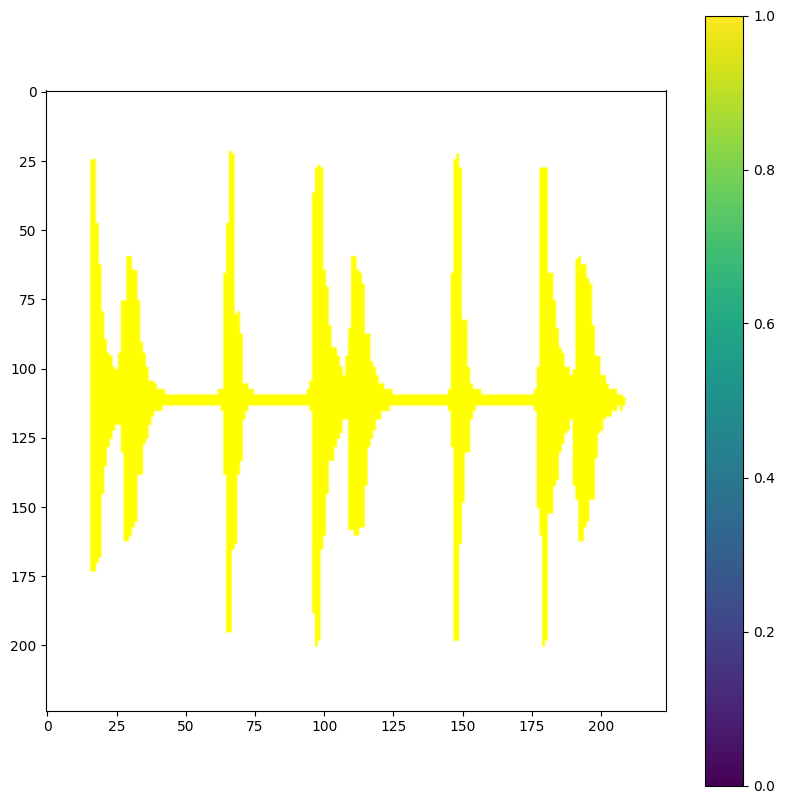

In [36]:
# plot the activation map of the first layer of the cnn
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt

# Load VGG16 without top layer (fully connected layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Extract the first layer
model = Model(inputs=base_model.input, outputs=base_model.layers[0].output)

# Load and preprocess an image
img_path = '../../dataset/audio_chunks_4000/murmurs_4000/abnormal_s3_2023_0_chunk_1.png'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Get the activation map
activation_map = model.predict(x)

# Plot the activation map
plt.figure(figsize=(10, 10))
plt.imshow(activation_map[0, :, :])
plt.colorbar()
plt.show()

In [14]:
# use random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=SEED, stratify=labels)

# Train the classifier
rf_classifier = RandomForestClassifier(random_state=SEED)
rf_classifier.fit(X_train, y_train)

# Evaluate
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f'Balanced accuracy: {balanced_accuracy}')

f1 = f1_score(y_test, y_pred, average='macro')
print(f'F1 score: {f1}')


Accuracy: 0.6897637795275591
Balanced accuracy: 0.47020976068345866
F1 score: 0.4428641331183704


In [15]:
# use catboost classifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=SEED, stratify=labels)

# Train the classifier
catboost_classifier = CatBoostClassifier(random_state=SEED, verbose=False)
catboost_classifier.fit(X_train, y_train)

# Evaluate
y_pred = catboost_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f'Balanced accuracy: {balanced_accuracy}')

f1 = f1_score(y_test, y_pred, average='macro')
print(f'F1 score: {f1}')

Accuracy: 0.7086614173228346
Balanced accuracy: 0.518668944198738
F1 score: 0.5124431964329135


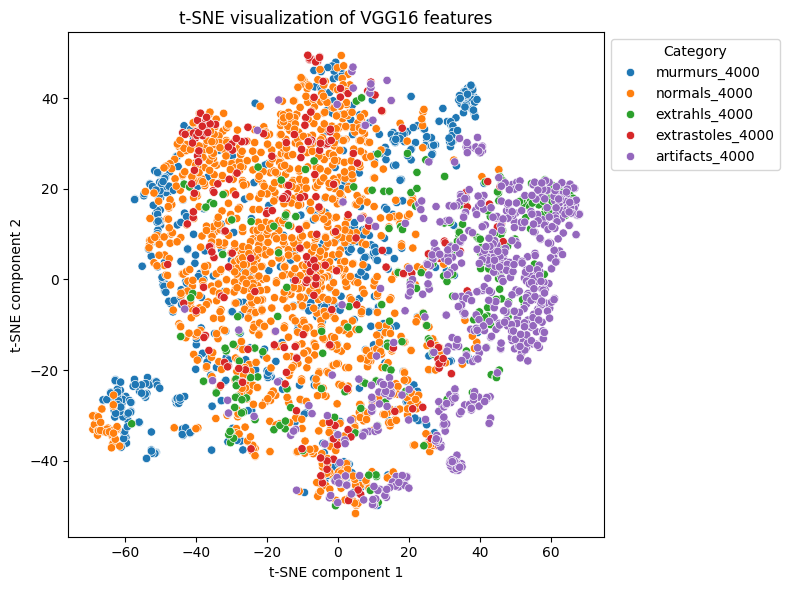

In [16]:
# visualize the features in 2D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

# Reduce the dimensionality of the features
pca = PCA(n_components=50)
features_pca = pca.fit_transform(features)

tsne = TSNE(n_components=2, random_state=SEED)
features_tsne = tsne.fit_transform(features_pca)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=features_tsne[:, 0], y=features_tsne[:, 1], hue=labels, palette='tab10')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.title('t-SNE visualization of VGG16 features')
plt.legend(title='Category', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

